###Daffa Rizki Rizaly - 2301931251

# Download Image

In [8]:
# Importing required libraries
import urllib.request

# Adding information about user agent
opener=urllib.request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)

# setting filename and image URL
filename = 'sunshine_dog.jpg'
image_url = "https://rockandrolldaycare.com/wp-content/uploads/2021/06/image2-1.png"

# calling urlretrieve function to get resource
urllib.request.urlretrieve(image_url, filename)

('sunshine_dog.jpg', <http.client.HTTPMessage at 0x7fa9e32b7d50>)

## PreProcess to Grayscale

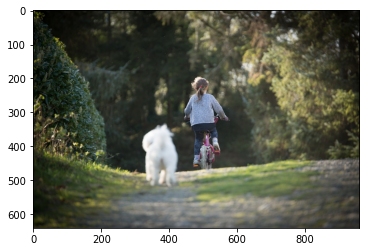

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

# Read in the image
image = mpimg.imread(filename)

plt.imshow(image)

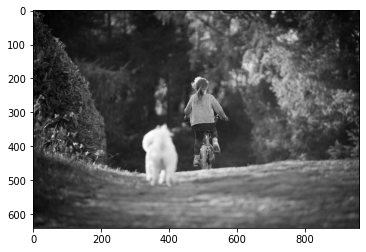

In [10]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

# Edge Detection

Please create edge detection function using these operator and please don't use any CV library. Just create simple iteration function over the image pixel value.

- Robert Operator
- Sobel Operaror
- Your own Operator

In [11]:
# initialization
w,h = gray.shape
from google.colab.patches import cv2_imshow

In [12]:
# Kernel operation using input operator of size 3*3
def GetSobel(image, Sobel, width, height):
    # Initialize the matrix
    I_d = np.zeros((width, height), np.float32)

    # For every pixel in the image
    for rows in range(width):
        for cols in range(height):
            # Run the Sobel kernel for each pixel
            if rows >= 1 or rows <= width-2 and cols >= 1 or cols <= height-2:
                for ind in range(3):
                    for ite in range(3):
                        I_d[rows][cols] += Sobel[ind][ite] * image[rows - ind - 1][cols - ite - 1]
            else:
                I_d[rows][cols] = image[rows][cols]

    return I_d

In [13]:
# Method implements the Harris Corner Detection algorithm
def HarrisCornerDetection(image):

    # The two Sobel operators - for x and y direction
    SobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    SobelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    w, h = image.shape

    # X and Y derivative of image using Sobel operator
    ImgX = GetSobel(image, SobelX, w, h)
    ImgY = GetSobel(image, SobelY, w, h)

    # # Eliminate the negative values
    # There are multiple ways this can be done
    # 1. Off setting with a positive value (commented out below)
    # 2. Setting negative values to Zero (commented out)
    # 3. Multiply by -1 (implemented below, found most reliable method)
    # ImgX += 128.0
    # ImgY += 128.0
    for ind1 in range(w):
        for ind2 in range(h):
            if ImgY[ind1][ind2] < 0:
                ImgY[ind1][ind2] *= -1
                # ImgY[ind1][ind2] = 0
            if ImgX[ind1][ind2] < 0:
                ImgX[ind1][ind2] *= -1
                # ImgX[ind1][ind2] = 0

    # # Display the output results after Sobel operations
    # cv2.imshow("SobelX", ImgX)
    # cv2.imshow("SobelY", ImgY)

    ImgX_2 = np.square(ImgX)
    ImgY_2 = np.square(ImgY)

    ImgXY = np.multiply(ImgX, ImgY)
    ImgYX = np.multiply(ImgY, ImgX)

    #Use Gaussian Blur
    Sigma = 1.4
    kernelsize = (3, 3)

    ImgX_2 = cv2.GaussianBlur(ImgX_2, kernelsize, Sigma)
    ImgY_2 = cv2.GaussianBlur(ImgY_2, kernelsize, Sigma)
    ImgXY = cv2.GaussianBlur(ImgXY, kernelsize, Sigma)
    ImgYX = cv2.GaussianBlur(ImgYX, kernelsize, Sigma)
    # print(ImgXY.shape, ImgYX.shape)

    alpha = 0.06
    R = np.zeros((w, h), np.float32)
    # For every pixel find the corner strength
    for row in range(w):
        for col in range(h):
            M_bar = np.array([[ImgX_2[row][col], ImgXY[row][col]], [ImgYX[row][col], ImgY_2[row][col]]])
            R[row][col] = np.linalg.det(M_bar) - (alpha * np.square(np.trace(M_bar)))
    return R

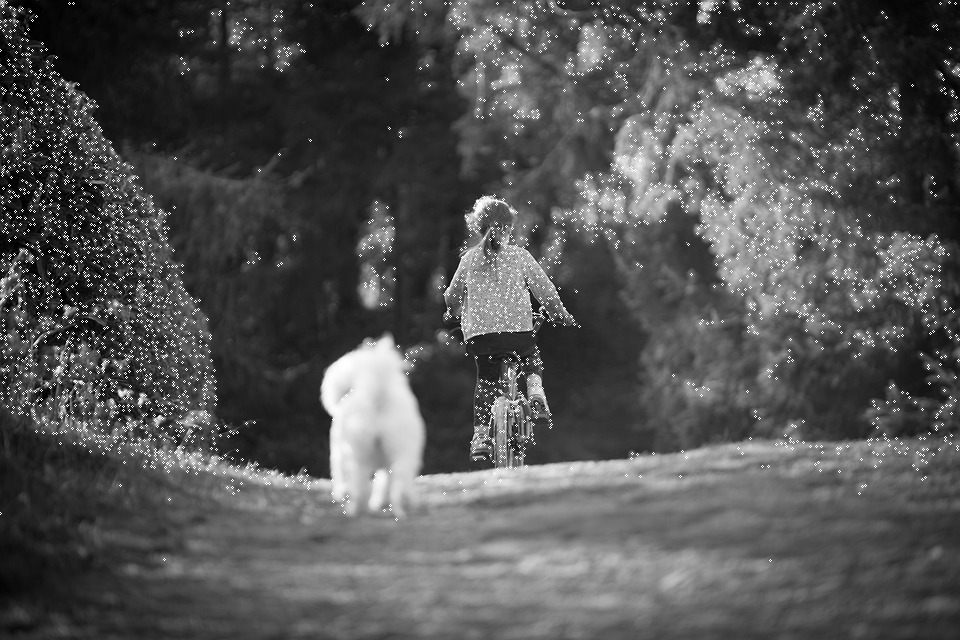

In [14]:
R = HarrisCornerDetection(gray)

# Empirical Parameter
# This parameter will need tuning based on the use-case
CornerStrengthThreshold = 600000

# Plot detected corners on image
radius = 1
color = (255, 0, 0)  # Green
thickness = 1

PointList = []
# Look for Corner strengths above the threshold
for row in range(w):
    for col in range(h):
        if R[row][col] > CornerStrengthThreshold:
            # print(R[row][col])
            max = R[row][col]

            # Local non-maxima suppression
            skip = False
            for nrow in range(5):
                for ncol in range(5):
                    if row + nrow - 2 < w and col + ncol - 2 < h:
                        if R[row + nrow - 2][col + ncol - 2] > max:
                            skip = True
                            break

            if not skip:
                # Point is expressed in x, y which is col, row
                cv2.circle(gray, (col, row), radius, color, thickness)
                PointList.append((row, col))

# Display image indicating corners and save it
cv2_imshow(gray)

cv2.waitKey(0)
cv2.destroyAllWindows()